# Association Rules

For this topic we are going to use the authors2 dataset, we will transform to a set of transactions extracting the most frequent word for the documents dataser and then computing the transaction for each document as the frequent words that apear in it. You can increase the number of words to be used, but more words do not usually means more itemsets, because they will be less frequent an the probability of being associated to other words will be lower.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from os import listdir
from os.path import join
from fim import fpgrowth
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

docpath = '/home/bejar/Data/authors/Auth2/'
docs = sorted(listdir(docpath))[1:]
pdocs = [join(docpath, f) for f in docs]
nfeatures = 100
cvec = CountVectorizer(input='filename', stop_words='english', max_features=nfeatures)
authors = cvec.fit_transform(pdocs)

lwords = [""] * len(cvec.vocabulary_)
for w in cvec.vocabulary_:
    lwords[cvec.vocabulary_[w]] = w

ldocs = []
for j in range(authors.shape[0]):
    doc = []
    for i in range(authors.shape[1]):
        if authors[j,i] != 0:
            doc.append(lwords[i])
    ldocs.append(doc)

These is what the transactions of the first three documents look like

In [2]:
print(ldocs[0])
print(ldocs[1])
print(ldocs[2])

['away', 'day', 'dear', 'did', 'far', 'father', 'friend', 'gave', 'good', 'having', 'head', 'house', 'lady', 'little', 'make', 'man', 'mind', 'mr', 'right', 'said', 'shall', 'think', 'time']
['did', 'far', 'felt', 'heard', 'know', 'lady', 'life', 'little', 'long', 'look', 'man', 'mr', 'night', 'room', 'said', 'shall', 'soon', 'taken', 'woman', 'young']
['asked', 'began', 'course', 'day', 'did', 'far', 'great', 'heard', 'just', 'knew', 'know', 'lady', 'little', 'long', 'make', 'man', 'mr', 'poor', 'replied', 'round', 'said', 'say', 'seen', 'soon', 'table', 'things', 'thought', 'took', 'voice', 'woman', 'years']


Now we are going to apply the **apriori** and **fp-growth** algorithms for obtaining association rules from these transactions. We are going to use the implementation that is in the library PyFIM (http://www.borgelt.net/pyfim.html), you can find also other association rules algorithms implemented.

First we apply **FP-Growth** for finding all the itemsets with a support larger than 10%. You can play with the support and see how many frequeny itemsets you get, but be careful, for values less than 10% and this dataset, even for 100 words, the number of possibilities explode and you will get out of memory.

In [3]:
from fim import fpgrowth, apriori

%time res = fpgrowth(ldocs, target='s', supp=10, zmin=1, report='ae', eval='c')

CPU times: user 1.02 s, sys: 70.5 ms, total: 1.09 s
Wall time: 1.08 s


The total number of itemsets for a suport of 10% is the following

In [4]:
print(len(res))

765480


These are some of the itemsets that are found

In [5]:
for i in range(10):
    print(res[i])

(('time', 'said'), (270, 0.8181818181818182))
(('like', 'said'), (262, 0.808641975308642))
(('like', 'time'), (245, 0.7561728395061729))
(('like', 'time', 'said'), (197, 0.8040816326530612))
(('man', 'said'), (261, 0.8446601941747572))
(('man', 'time'), (231, 0.7475728155339806))
(('man', 'time', 'said'), (194, 0.8398268398268398))
(('man', 'like'), (230, 0.7443365695792881))
(('man', 'like', 'said'), (190, 0.8260869565217391))
(('man', 'like', 'time'), (176, 0.7652173913043478))


Now for **apriori**

In [6]:
%time res = apriori(ldocs, target='s', supp=10, zmin=1, report='ae', eval='c')

print(len(res))

CPU times: user 2.14 s, sys: 72.6 ms, total: 2.21 s
Wall time: 2.19 s
765480


And as expected, the number of itemsets found is exactly the same

Computing the frequent itemsets with growing support we can also see that the actual number of itemsets descends exponentially with the support. Is important to have in mind that we will have always an exponential number of possible itemsets ($2^n$), but the actual number depends on how items are associated in our data and the level of support.

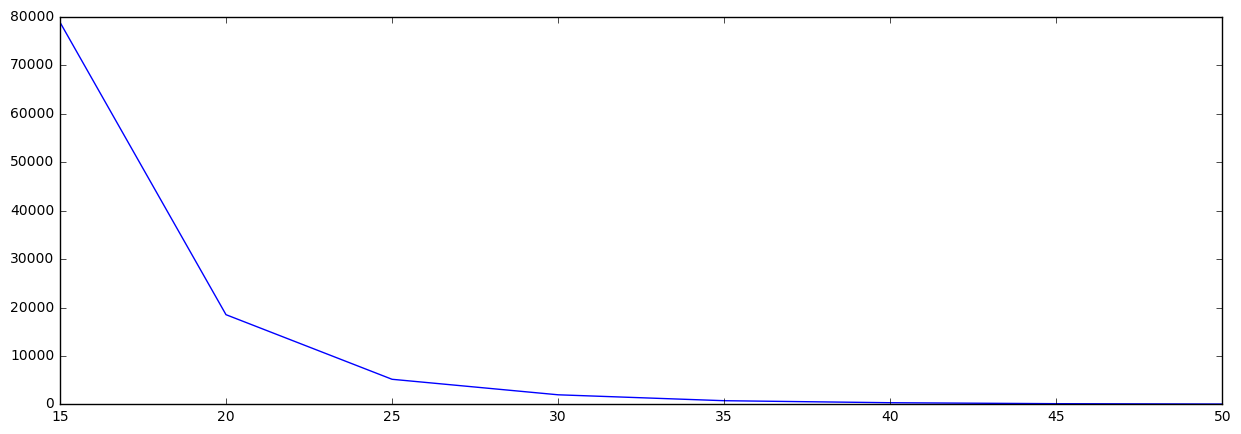

In [7]:
nitsets = []
for sup in range(15, 51, 5):
    res = fpgrowth(ldocs, target='s', supp=sup, zmin=1, report='ae', eval='c')
    nitsets.append(len(res))
    
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
plt.plot(range(15, 51, 5), nitsets)

We can also run both algorithms for the same support and check that, as expected, the **fp-growth** algorithm is more efficient when the number of itemsets to explore is large.

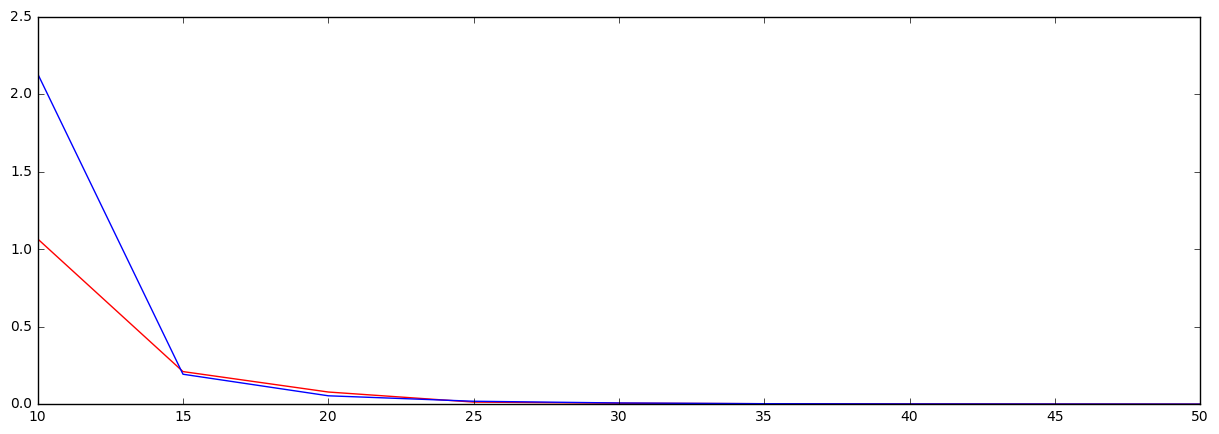

In [8]:
import time


ltimesfp = []
ltimesap = []
for sup in range(10, 51, 5):
    itime = time.perf_counter()
    res = fpgrowth(ldocs, target='s', supp=sup, zmin=1, report='ae', eval='c')
    etime = time.perf_counter()
    ltimesfp.append(etime-itime)
    itime = time.perf_counter()
    res = apriori(ldocs, target='s', supp=sup, zmin=1, report='ae', eval='c')
    etime = time.perf_counter()
    ltimesap.append(etime-itime)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
plt.plot(range(10, 51, 5), ltimesfp, 'r')
plt.plot(range(10, 51, 5), ltimesap, 'b')